Question 1:Convolution Function

Input size torch.Size([3, 212, 200])
Input:


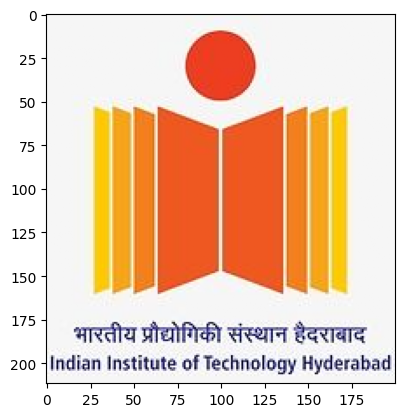

filter kernel: tensor([[[ 0.5881,  0.6371,  0.8992, -0.3293,  0.5290],
         [ 0.0643, -2.4958,  0.1730, -0.1963,  0.2756],
         [ 2.1990, -1.2909, -0.1304,  0.8252, -0.3952],
         [ 1.2849, -0.8625,  0.4206,  2.0053, -0.6773],
         [ 1.1585, -0.9310, -0.8232, -0.3325,  0.6284]],

        [[ 0.5881,  0.6371,  0.8992, -0.3293,  0.5290],
         [ 0.0643, -2.4958,  0.1730, -0.1963,  0.2756],
         [ 2.1990, -1.2909, -0.1304,  0.8252, -0.3952],
         [ 1.2849, -0.8625,  0.4206,  2.0053, -0.6773],
         [ 1.1585, -0.9310, -0.8232, -0.3325,  0.6284]],

        [[ 0.5881,  0.6371,  0.8992, -0.3293,  0.5290],
         [ 0.0643, -2.4958,  0.1730, -0.1963,  0.2756],
         [ 2.1990, -1.2909, -0.1304,  0.8252, -0.3952],
         [ 1.2849, -0.8625,  0.4206,  2.0053, -0.6773],
         [ 1.1585, -0.9310, -0.8232, -0.3325,  0.6284]]])
kernel dimensions torch.Size([3, 5, 5])
OUTPUT activation maps FOR VARIOUS ACTIVATION FUNCTIONS:
ReLU:
output dim torch.Size([1, 210, 198])

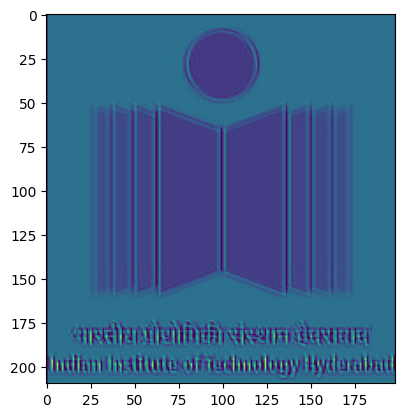

Sigmoid:
output dim torch.Size([1, 210, 198])


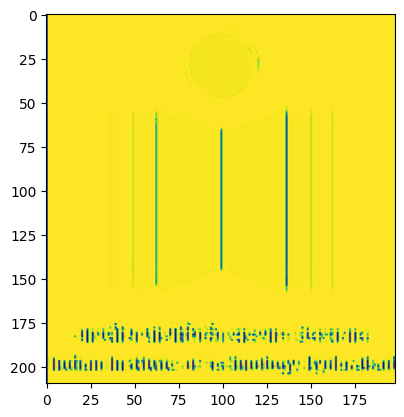

PReLU:
output dim torch.Size([1, 210, 198])


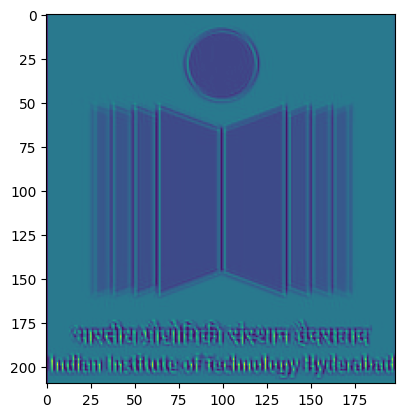

Tanh:
output dim torch.Size([1, 210, 198])


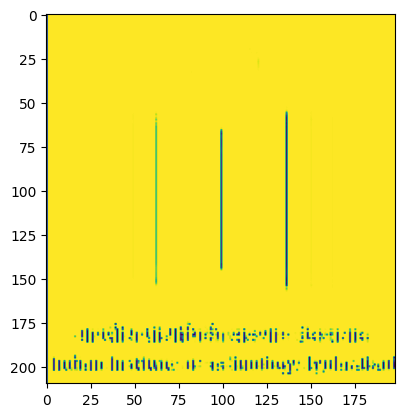

In [2]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np



####Displaying the input image
img=Image.open("iithlogo1.jpg")
transform=transforms.ToTensor()
imgtensor=transform(img)
print("Input size",imgtensor.size())
print("Input:")
plt.imshow(imgtensor.permute(1,2,0))
plt.show()
#imgtensor is 3*212*200 = no of channels * height * width



def ReLU(x):
  if x>=0: return x
  else: return 0
def sigmoid(x):
   return 1/(1+np.exp(-x))

#paramter=0.1
def PReLU(x):
  if x>=0: return x
  else: return 0.1*x

def tanhyper(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))



def convolution_function(input,kernel,stride,padding,nonlinearity):
 padder=torch.nn.ZeroPad2d(padding)
 input=padder(input)
 width=input.size(dim=2)
 height=len(input[0,0:,0])
    
    
 #kwidth is the kernel witdh
 kwidth=len(kernel[0,0,0:])
 
 #kheight is the kernel witdh
 kheight=len(kernel[0,0:,0])

 #Output is one 2d feature map with width and heigth equals int((height-kheight)/stride)+1 and int((width-kwidth)/stride)+1  respectively 
 output=torch.zeros((1,int((height-kheight)/stride)+1,int((width-kwidth)/stride)+1))


 # output[0,int(i/stride),int(j/stride)]  is the ((i/stride)th,(j/stride)th) term of output tensor to fill
 for i in range(0,height-kheight+1,stride):
  for j in range(0,width-kwidth+1,stride):
   output[0,int(i/stride),int(j/stride)]=nonlinearity(torch.sum(torch.mul(input[0:,i:i+kheight,j:j+kwidth],kernel[0:])).item())
 print("output dim",output.size())
 return output


#Making a kernel to send it to convolution_function
kerneltensor=torch.zeros((3,5,5))
temp=torch.randn((5,5))
kerneltensor[0,:,:]=temp
kerneltensor[1,:,:]=temp
kerneltensor[2,:,:]=temp
print("filter kernel:",kerneltensor)
print("kernel dimensions",kerneltensor.size())



print("OUTPUT activation maps FOR VARIOUS ACTIVATION FUNCTIONS:")
print("ReLU:")
plt.imshow(convolution_function(imgtensor,kerneltensor,1,1,ReLU).permute(1,2,0))
plt.show()

print("Sigmoid:")
plt.imshow(convolution_function(imgtensor,kerneltensor,1,1,sigmoid).permute(1,2,0))
plt.show()

print("PReLU:")
plt.imshow(convolution_function(imgtensor,kerneltensor,1,1,PReLU).permute(1,2,0))
plt.show()

print("Tanh:")
plt.imshow(convolution_function(imgtensor,kerneltensor,1,1,tanhyper).permute(1,2,0))
plt.show()


Question 2: Pooling Layer

input to pooling layer size: torch.Size([1, 210, 198])


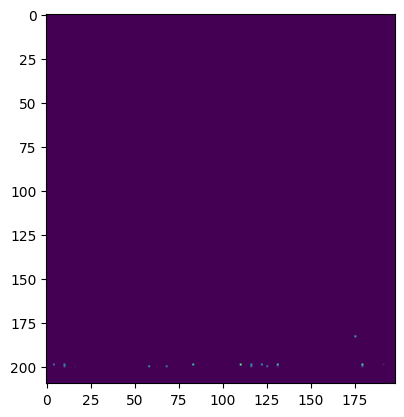

pooled output:
output sze: torch.Size([1, 42, 39])


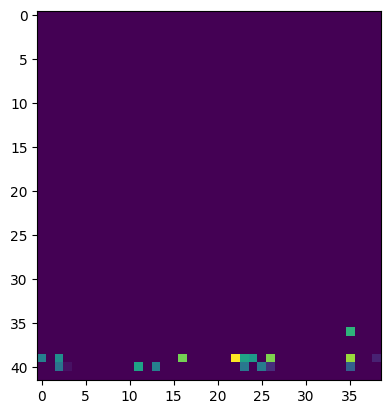

In [10]:
#stride and padding both are 1
input=convolution_function(imgtensor,kerneltensor,1,1,ReLU)

print("input to pooling layer size:",input.size())
plt.imshow(input.permute(1,2,0))
plt.show()



def maxpool(tensor):
  return torch.max(tensor)



def pooling_function(input,stride,poolingfun,kernel_size):
 #width=input.size(dim=2) showsw error in pooling_layer_function
 width=input.size(dim=2)
 height=len(input[0,0:,0])
 kwidth=kernel_size
 kheight=kernel_size
 #kwidth is the kernel witdh
 output=torch.zeros((1,int((height-kheight)/stride)+1,int((width-kwidth)/stride)+1))
 for i in range(0,height-kheight+1,stride):
  for j in range(0,width-kwidth+1,stride):
   # i for (i/stride)th term to fill the output tensor like Arimethic Progressions
   # j for (j/stride)th term to fill the output tensor
   output[0,int(i/stride),int(j/stride)]=poolingfun(input[0,i:i+stride,j:j+stride])
 return output



print("pooled output:")
plt.imshow(pooling_function(input,5,maxpool,5).permute(1,2,0))
output=pooling_function(input,5,maxpool,5)
print("output sze:",output.size())
plt.show()



Question 3: Convolution layer function:

input:


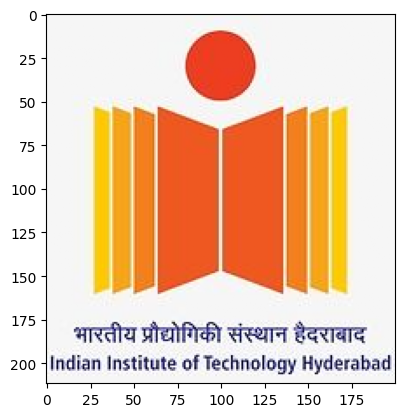

kernel no. 1 tensor([[[ 2.1162e-01,  1.1790e+00, -5.5809e-01,  2.9306e+00,  1.4917e+00],
         [-2.3383e-03, -1.9086e-01,  2.1347e+00,  1.7738e-01,  1.7480e+00],
         [ 1.7712e+00,  2.9402e-01,  4.6895e-01,  1.2039e+00,  9.2401e-01],
         [ 1.8713e+00,  1.7479e+00,  2.1364e+00,  2.3418e+00,  1.6863e+00],
         [ 2.4914e+00, -2.3040e-02,  1.9466e+00,  2.9346e-01,  2.8005e+00]],

        [[ 2.1162e-01,  1.1790e+00, -5.5809e-01,  2.9306e+00,  1.4917e+00],
         [-2.3383e-03, -1.9086e-01,  2.1347e+00,  1.7738e-01,  1.7480e+00],
         [ 1.7712e+00,  2.9402e-01,  4.6895e-01,  1.2039e+00,  9.2401e-01],
         [ 1.8713e+00,  1.7479e+00,  2.1364e+00,  2.3418e+00,  1.6863e+00],
         [ 2.4914e+00, -2.3040e-02,  1.9466e+00,  2.9346e-01,  2.8005e+00]],

        [[ 2.1162e-01,  1.1790e+00, -5.5809e-01,  2.9306e+00,  1.4917e+00],
         [-2.3383e-03, -1.9086e-01,  2.1347e+00,  1.7738e-01,  1.7480e+00],
         [ 1.7712e+00,  2.9402e-01,  4.6895e-01,  1.2039e+00,  9.2401e-

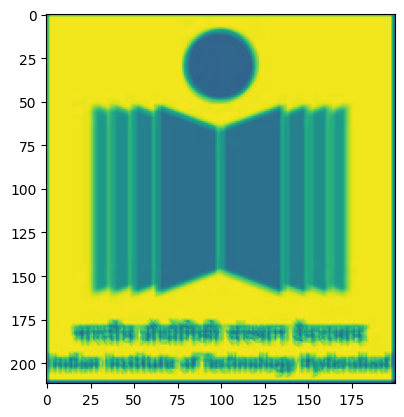

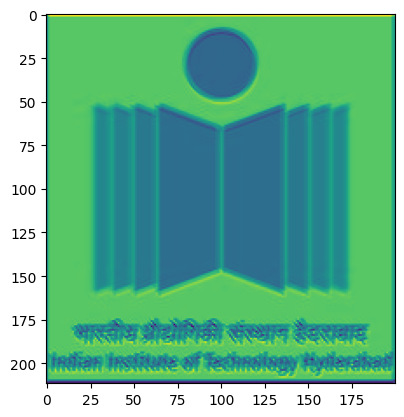

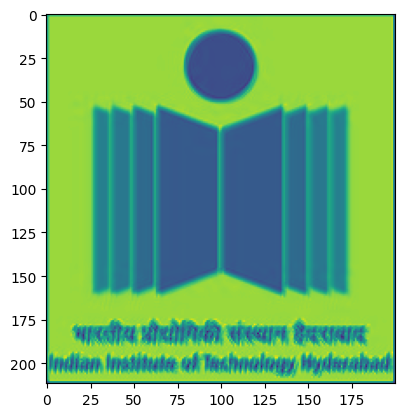

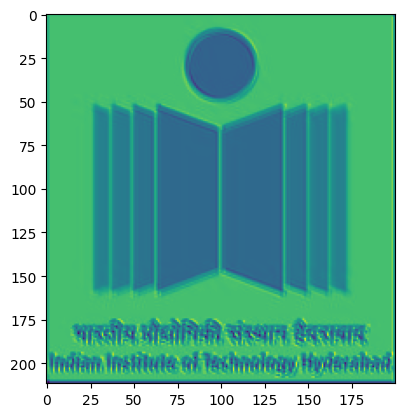

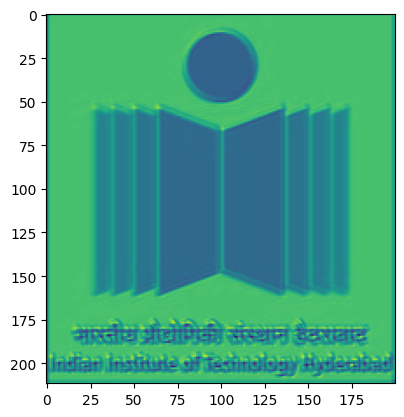

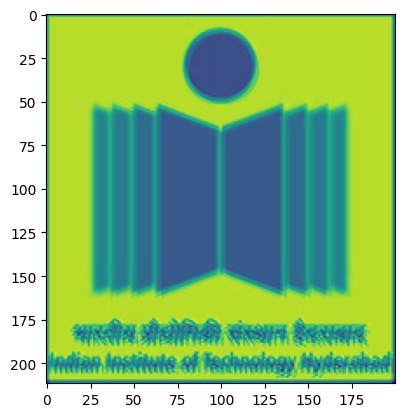

In [14]:

print("input:")
input=imgtensor

plt.imshow(input.permute(1,2,0))
plt.show()

#kerenel_box has no of kerenels in it of dimension=kernel_dim (a tensor denoting the dimensions of each filter kernel)
def convolution_func_layer(input,no_of_filters,kernel_dim,kernel_box,padding,stride,nonlinearity):
 print("input dim",in)
 width=input.size(dim=2)
 height=len(input[0,0:,0])
 kwidth=kernel_dim[2]
 kheight=kernel_dim[1]
 output_box=torch.zeros((no_of_filters,int((height-kheight+2*padding)/stride)+1,int((width-kwidth+2*padding)/stride)+1))
 for i in range(0,no_of_filters):
   output_box[i]=convolution_function(input,kernel_box[i],stride,padding,nonlinearity)
 return output_box



#kernel_box having 6 tensor filters having dimension 3*5*5
kernel_box=torch.zeros((6,3,5,5))


#setting all the six filters of the dimension 3*5*5 having 25 parameters and Displaying
temp=torch.zeros((6,5,5))
for i in range(0,len(temp)):
  #mean is (i+1) and variance =(i+1)**2
  temp[i]=(i+1)+((i+1)**2)*torch.randn((5,5))
  kernel_box[i][0]=temp[i]
  kernel_box[i][1]=temp[i]
  kernel_box[i][2]=temp[i]
  print("kernel no.",i+1,kernel_box[i])


kernel_dim=torch.tensor([3,5,5])
output_box=convolution_func_layer(input,6,kernel_dim,kernel_box,2,1,ReLU)




print("verifying the output size:",output_box.size())

print("OUTPUTS:")
for i in range(0,len(output_box)):
  #no third dimension to permute
  plt.imshow(output_box[i].permute(0,1))
  plt.show()

Question 4:Pooling layer function:

INPUT CHANNELS


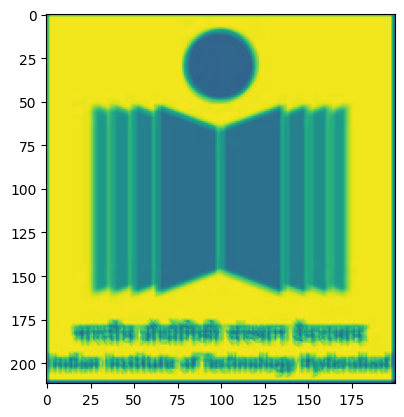

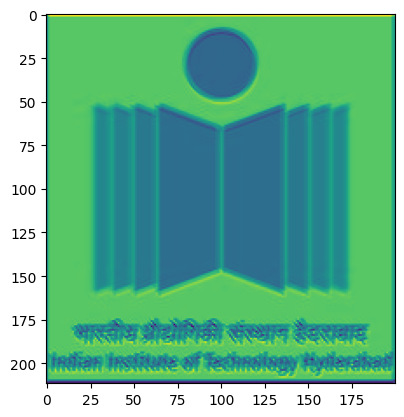

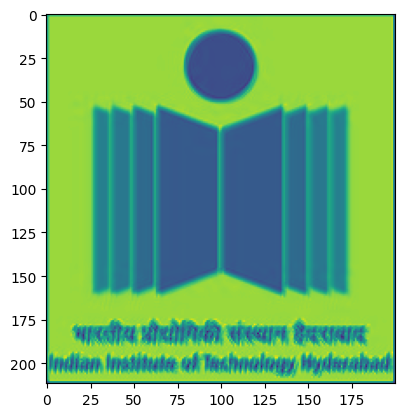

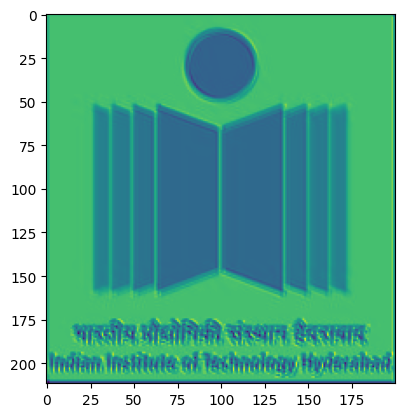

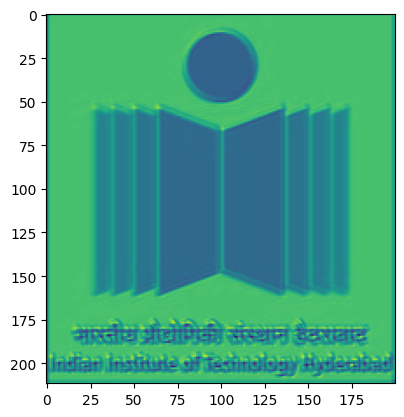

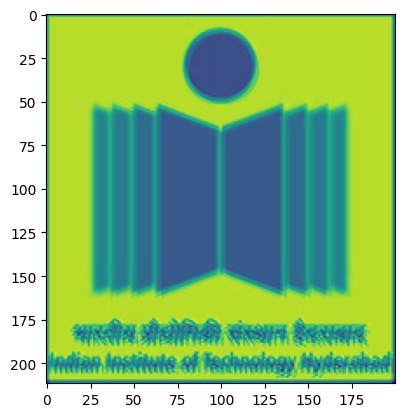

OUTPUT CHANNELS


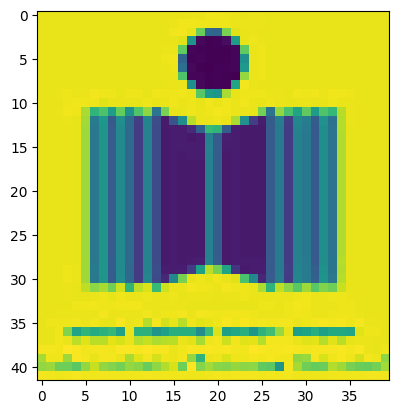

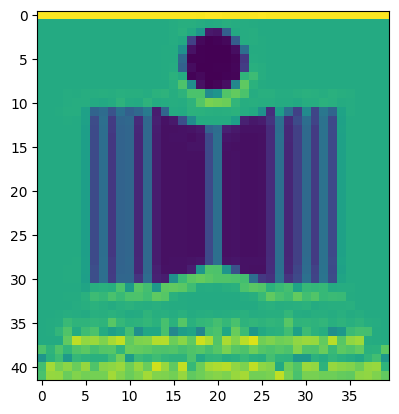

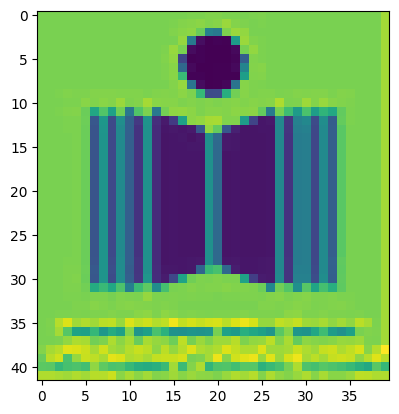

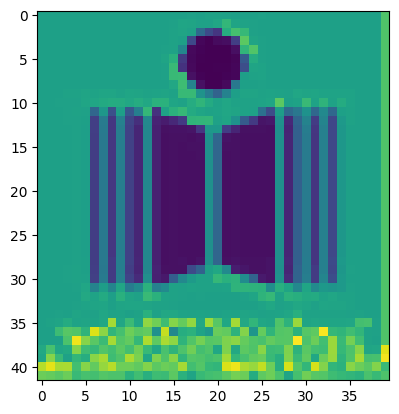

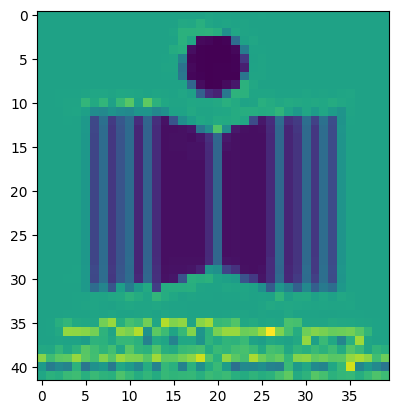

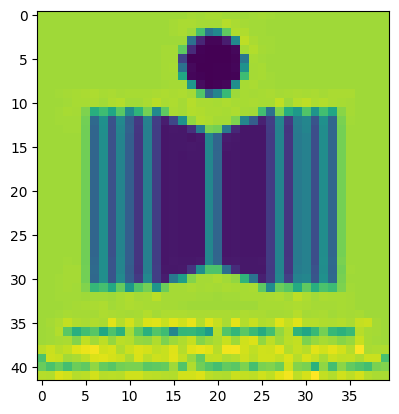

In [18]:
input=output_box
print("INPUT CHANNELS")
for i in range(0,len(input)):
  #no third dimension to permute
  plt.imshow(input[i].permute(0,1))
  plt.show()


def GlobalAveragePool(tensor2d):
  return torch.sum(tensor2d)/(tensor2d.size(dim=0)*tensor2d.size(dim=1))




def pooling_layer_function(input,poolingfun,stride,kernel_size,GAP):
 if GAP==0: 
  no_of_channels=len(input[0:,0,0])
  height=len(input[0,0:,0])
  width=len(input[0,0,0:])
  kheight=kernel_size
  kwidth=kernel_size

  #no reduction in the no of channels
  output_box=torch.zeros((no_of_channels,int((height-kheight)/stride)+1,int((width-kwidth)/stride)+1))

  #
  inputaugment=torch.zeros((1,height,width))
  for i in range(0,no_of_channels):
    inputaugment[0,0:,0:]=input[i]
    #notice the difference between the dimension of output_box[i] and inputaugment 
    #no difference with inputaugment and input because we nowwhere will use the 0th dimension of input
    output_box[i]=pooling_function(inputaugment,stride,poolingfun,kernel_size)
  return output_box
 else :
  no_of_channels=len(input[0:,0,0])
  output_box=torch.zeros(no_of_channels,1)
  for i in range(0,no_of_channels):
   output_box[i][0]=GlobalAveragePool(input[i])
  return output_box

#GAP takes binary inputs 0 or 1 to activate Global Average Pool 
GAP=0
output_box1=pooling_layer_function(input,maxpool,5,5,GAP)




if GAP==0:
 print("OUTPUT CHANNELS")
 for i in range(0,len(output_box1)):
  plt.imshow(output_box1[i].permute(0,1))
  plt.show()
#else: it can plt.imshow(scalar) throws an error

Queston 5:Flattening (unraveling) function:

In [27]:
input=output_box1
def flattening(input,output_vec_size):
 #input is d * h * w
 #lets convert it into a vector
 vec=input.reshape((-1,1))
 #print(len(vec))

 #to convert this vector into vector of specified output vec_size we will use matrix vector product
 weight_matrix=torch.zeros((output_vec_size,len(vec)))
 #using the identity matrix output vector similar to input can be obtained
 weight_matrix[0:min(len(vec),output_vec_size),0:min(len(vec),output_vec_size)]=torch.eye(min(len(vec),output_vec_size))
 return torch.matmul(weight_matrix,vec)

#A quick check if output_vec_size is same as input vector then same vector should be returned
#vec=input.reshape((-1,1))
#print(vec==flattening(input,10080))

print("output dimensions",flattening(input,250).size())
output5=flattening(input,250)

output dimensions torch.Size([250, 1])


Question 6: Multilayer Perceptron (MLP) function:

In [30]:
input=output5
#tensor of 1 d vector

def MLP(input,no_of_hiddens,size_info_eachhidden,nonlinearity,output_size):
  size_of_prelayer=len(input)
  input_prelayer=input
  output_at_thislayer=0

  
  #i=0 ,1,2,3,4 .. implies the hidden layer 1,2,3,4,5...
  for i in range(0,no_of_hiddens):
    #creating a weight matrix for each layer
    #to stop randomisation again and again at again and again run times to take observation in question 8
    #torch.random.manual_seed(0) when i put ouput of every where is same but that's not the case with torch.ones but still it is cont
    W=torch.rand((size_info_eachhidden[i],size_of_prelayer))
    output_at_thislayer=torch.matmul(W,input_prelayer)
    #NONLINEARITY on output_at_thislayer vector
    for j in range(0,len(output_at_thislayer)): output_at_thislayer[j][0]=nonlinearity(output_at_thislayer[j][0])
    #changing the value of size_of_prelayer for next hidden layer
    size_of_prelayer=size_info_eachhidden[i]
    #changing the input_prelayer for next hidden layer
    input_prelayer=output_at_thislayer
  

  #above for loop leaves at last output at the last hidden layer in the output_at_thislayer
  #output_at_thislayer becomes input for the last output layer
  output_W=torch.rand((output_size,len(output_at_thislayer)))
  final_output=torch.matmul(output_W,output_at_thislayer)
  #non-linearity at final_output
  for j in range(0,len(final_output)): final_output[j][0]=nonlinearity(final_output[j][0])

  return final_output

no_of_hiddens=1

#this tensor corresponds to size of hidden layers 1st ,2nd ,3rd,4th,5th
size_info_eachhidden=torch.tensor([5])
output6=MLP(input,no_of_hiddens,size_info_eachhidden,sigmoid,5)
print("OUTPUT VECTOR  WITHOUT SOFTMAX ",'\n',output6)



def softmax(x):
  den=0
  for i in range(0,len(x)):
   den=den+np.exp(x[i][0].item())
  return np.exp(x)/den
print("OUTPUT VECTOR  WITH SOFTMAX ",'\n',softmax(output6))



#from decimal import Decimal saying tensorFloat and Decimal not compatible


OUTPUT VECTOR  WITHOUT SOFTMAX  
 tensor([[0.9742],
        [0.8935],
        [0.8855],
        [0.8783],
        [0.8476]])
OUTPUT VECTOR  WITH SOFTMAX  
 tensor([[0.2161],
        [0.1994],
        [0.1978],
        [0.1963],
        [0.1904]])


Question 7:Feed-forward path:

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
******
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
******
******
******
torch.Size([1, 3, 32, 32]) tensor([6])
tensor([[0.1021],
        [0.0979],
        [0.0990],
        [0.1030],
        [0.1031],
        [0.0983],
        [0.1041],
        [0.1029],
        [0.0960],
        [0.0936]])
torch.Size([10, 1])


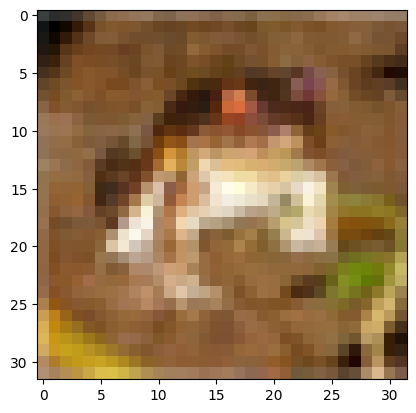

In [31]:
import torchvision

#taking an image from CIFAR-10
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1, shuffle=False)

#label tensor has base indexing 0
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("******")
print(train_dataset)
print("******")
print(trainloader)
print("******")
print(iter(trainloader))
print("******")
image,label=next(iter(trainloader))

print(image.size(),label)
plt.imshow(image[0].permute(1,2,0))

#Lets start performiong steps in the Question
def feed_forward(input):
 torch.manual_seed(42)
 #to make constant the aparmeters of this function  and the function MLP to ehich it calls
 #torch.manual_seed(42)
 #Step 1: 
 #print(input.size())
 

 ############Check of seeding 

 #Step 2:
 #(3 channels for RGB 3*3 is the dimension of the image
 kernel_dim=torch.tensor([3,3,3])
 #kernel_box having 16 tensor filters having dimension 3*3*3
 kernel_box=torch.zeros((16,3,3,3))
 temp=torch.zeros((16,3,3))
 for i in range(0,len(temp)):
  #mean is (i+1) and variance =(i+1)**2
  temp[i]=torch.randn((3,3))
  #3 channels for RGB
  kernel_box[i][0]=temp[i]
  kernel_box[i][1]=temp[i]
  kernel_box[i][2]=temp[i]
 #padding=0 and stride =1 by default
 output71=convolution_func_layer(input,16,kernel_dim,kernel_box,0,1,sigmoid)
 #print(output71.size())
 #print(output71)


 #Step 3:
 #GAP=0 because no global average pooling
 output72=pooling_layer_function(output71,maxpool,2,2,0)
 #print(output72.size())
 #print(output72)
 #Step 4:
 # 16 channels and 3*3 in 2d is the dimension of the kernel for the output72 as input to convolution_func_layer
 kernel_dim=torch.tensor([16,3,3])
 #kernel_box having 8 tensor filters having dimension 16*3*3 for 16 channeled input
 kernel_box=torch.zeros((8,16,3,3))
 temp=torch.zeros((8,3,3))
 for i in range(0,len(temp)):
  #mean is (i+1) and variance =(i+1)**2
  temp[i]=torch.randn((3,3))
  #16 channels for 16 chanelled input
  for j in range(0,len(kernel_box[0,0:,0,0])):
    kernel_box[i][j]=temp[i]

 #stride=1 and padding=0 by default and no_of_filters=8
 output73=convolution_func_layer(output72,8,kernel_dim,kernel_box,0,1,sigmoid)
 #print("kal",output73)


 #Step 5:
 #GAP=0 because no global average pooling
 output74=pooling_layer_function(output73,maxpool,2,2,0)
 #print("kalu",output74)


 #Step 6:
 #GAP=1 here and input =output74 and parameters we dont care about
 output75=pooling_layer_function(output74,maxpool,0,0,GAP=1)
 #print("kaluuuu",output75+1)

 #Step 7:
 no_of_hiddens=1

 #this tensor corresponds to size of hidden layers 1st ,2nd ,3rd,4th,5th
 #this hidden layer has same size as input
 size_info_eachhidden=torch.tensor([8])
 #output_size=10 i.e. 10 output nodes
 output76=MLP(output75,no_of_hiddens,size_info_eachhidden,sigmoid,10)
 #print(output76.size())
 #APPLYING SOFTMAX
 output77=softmax(output76)

 #DIMENSION OF THE FINAL OUTPUT
 return output77

input=image[0]

output777=feed_forward(input)
print(output777)
print(output777.size())

Question 8:a)

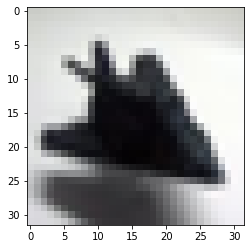

label tensor(0.)
tensor([[0.1021],
        [0.0980],
        [0.0990],
        [0.1030],
        [0.1031],
        [0.0983],
        [0.1040],
        [0.1029],
        [0.0961],
        [0.0936]])


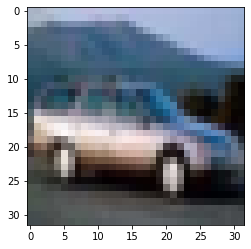

label tensor(1.)
tensor([[0.1021],
        [0.0979],
        [0.0990],
        [0.1030],
        [0.1031],
        [0.0983],
        [0.1041],
        [0.1029],
        [0.0960],
        [0.0936]])


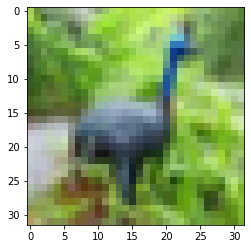

label tensor(2.)
tensor([[0.1021],
        [0.0979],
        [0.0990],
        [0.1030],
        [0.1031],
        [0.0983],
        [0.1041],
        [0.1029],
        [0.0960],
        [0.0936]])


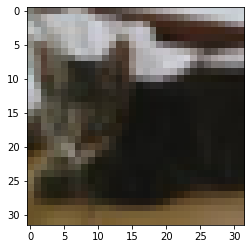

label tensor(3.)
tensor([[0.1021],
        [0.0979],
        [0.0990],
        [0.1030],
        [0.1031],
        [0.0983],
        [0.1041],
        [0.1029],
        [0.0960],
        [0.0936]])


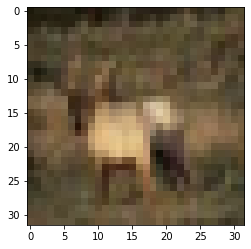

label tensor(4.)
tensor([[0.1021],
        [0.0979],
        [0.0990],
        [0.1030],
        [0.1031],
        [0.0983],
        [0.1041],
        [0.1029],
        [0.0960],
        [0.0936]])


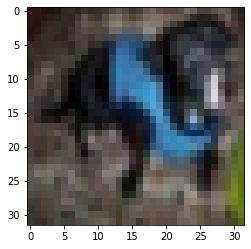

label tensor(5.)
tensor([[0.1021],
        [0.0979],
        [0.0990],
        [0.1030],
        [0.1031],
        [0.0983],
        [0.1041],
        [0.1029],
        [0.0961],
        [0.0936]])


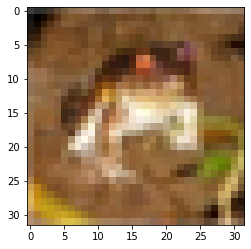

label tensor(6.)
tensor([[0.1021],
        [0.0979],
        [0.0990],
        [0.1030],
        [0.1031],
        [0.0983],
        [0.1041],
        [0.1029],
        [0.0960],
        [0.0936]])


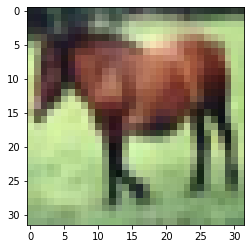

label tensor(7.)
tensor([[0.1021],
        [0.0979],
        [0.0990],
        [0.1030],
        [0.1031],
        [0.0983],
        [0.1041],
        [0.1029],
        [0.0961],
        [0.0936]])


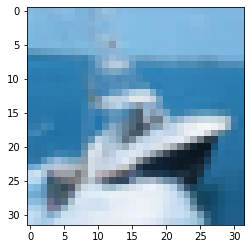

label tensor(8.)
tensor([[0.1021],
        [0.0979],
        [0.0990],
        [0.1030],
        [0.1031],
        [0.0982],
        [0.1041],
        [0.1029],
        [0.0960],
        [0.0936]])


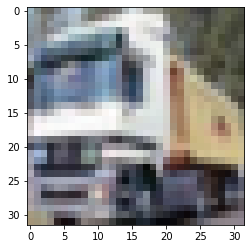

label tensor(9.)
tensor([[0.1021],
        [0.0979],
        [0.0990],
        [0.1030],
        [0.1031],
        [0.0983],
        [0.1041],
        [0.1029],
        [0.0961],
        [0.0936]])


In [ ]:
#store contains 10 diffrenet images of different classes their dimension is 3*32*32
inputstore=torch.zeros((10,3,32,32))
labelstore=torch.zeros(10)
map=torch.zeros(10)

for image,label in trainloader:
 if map[label.item()]==0: 
   inputstore[label.item()]=image[0]
   labelstore[label.item()]=label.item()
   map[label.item()]=1

for i in range(0,10):
  plt.imshow(inputstore[i].permute(1,2,0))
  plt.show()
  print("label",labelstore[i])
  print(feed_forward(inputstore[i]))

Observations : ouput are almost same.Randomly initialised Network fixed paramters show very much similarity in the output .

Question 8 b):

In [41]:
#store contains 10 diffrenet images of different classes their dimension is 3*32*32
inputstore=torch.zeros((10,3,3,32,32))
labelstore=torch.zeros(10)
map=torch.zeros(10)


for image,label in trainloader:
 if map[label.item()]<2: 
   inputstore[label.item()][int(map[label.item()].item())]=image[0]
   labelstore[label.item()]=label.item()
   map[label.item()]=map[label.item()]+1

from sklearn.decomposition import PCA
pca=PCA(n_components=2)



legendname=[]
data=[]
for i in range(0,10):
  print("label",labelstore[i].item())
  legendname.append(classes[int(labelstore[i].item())])
  #x contains the the samples with their features x dimension is n_samples * n _features
  x=torch.zeros((3,10))
  #just making it into 1d by reshape
  x[0]=flattening(inputstore[i][0],10).reshape(-1)
  x[1]=flattening(inputstore[i][1],10).reshape(-1)
  x[2]=flattening(inputstore[i][2],10).reshape(-1)
  data.append(pca.fit_transform(x))



label 0.0
label 1.0
label 2.0
label 3.0
label 4.0
label 5.0
label 6.0
label 7.0
label 8.0
label 9.0


['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(10, 3, 2)


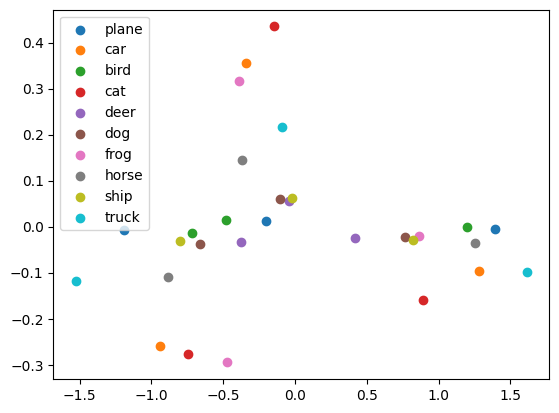

In [42]:
print(legendname)
data=np.array(data)
print(np.shape(data))


for i in range(0,10):
  plt.scatter(data[i,0:,0],data[i,0:,1])

plt.legend(legendname,loc='best')


In [ ]:
##########END